In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [64]:
BASEDIR = "/home/bach/.local/mnt/triton_scratch/projects/rt_msms_ssvm/src/ssvm/experiments/bioinf_redo/logs_triton/"
IDIR_01 = os.path.join(BASEDIR, "version_01a")
IDIR_02 = os.path.join(BASEDIR, "version_02__L_experiments")

In [92]:
# version_01a
df_01 = []
for spl in range(10):
        for ds in ["ds=CASMI__ion=negative", "ds=EA__ion=negative", "ds=EA__ion=positive"]:
            df_01.append(pd.read_csv(os.path.join(IDIR_01, ds, "topk__spl=%03d.tsv" % spl), sep="\t").assign(spl=spl, ds=ds))
            
df_01 = pd.concat(df_01)

# version_02 - L experiments ---------------
df_02 = []
df_baseline = []

for L in [2, 6, 12]:
    for spl in range(10):
        for ds in ["ds=CASMI__ion=negative", "ds=EA__ion=negative", "ds=EA__ion=positive"]:
            df_02.append(pd.read_csv(os.path.join(IDIR_02, "L=%d" % L, ds, "topk__spl=%03d.tsv" % spl), sep="\t").assign(spl=spl, L=L, ds=ds))
            
            if L == 2:
                df_baseline.append(pd.read_csv(os.path.join(IDIR_02, "L=%d" % L, ds, "topk__baseline__spl=%03d.tsv" % spl), sep="\t").assign(spl=spl, ds=ds))
        
df_02 = pd.concat(df_02)
df_baseline = pd.concat(df_baseline)

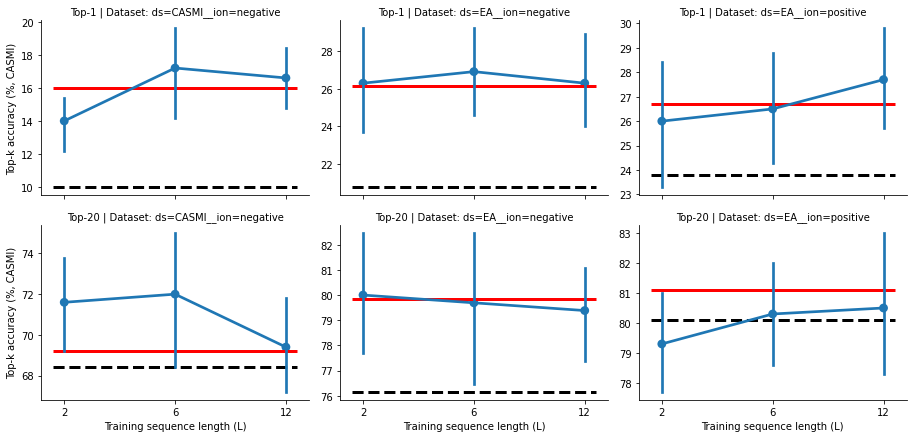

In [107]:
g = sns.catplot(data=df_02[df_02["k"].isin([1, 20])], x="L", y="top_acc_perc__casmi", row="k", col="ds", kind="point", sharey=False, height=3, aspect=1.4)
g.set_titles(row_template="Top-{row_name}", col_template="Dataset: {col_name}")
g.set_xlabels("Training sequence length (L)")
g.set_ylabels("Top-k accuracy (%, CASMI)")

# Plot results for random sequence lengths
_agg = df_01[df_01["k"].isin([1, 20])].drop("spl", axis=1).groupby(["ds", "k"]).mean()
g.axes[0, 0].hlines(_agg.loc[("ds=CASMI__ion=negative", 1)].item(), -0.1, 2.1, color="red", linestyle="-", linewidth=3)
g.axes[1, 0].hlines(_agg.loc[("ds=CASMI__ion=negative", 20)].item(), -0.1, 2.1, color="red", linestyle="-", linewidth=3)
g.axes[0, 1].hlines(_agg.loc[("ds=EA__ion=negative", 1)].item(), -0.1, 2.1, color="red", linestyle="-", linewidth=3)
g.axes[1, 1].hlines(_agg.loc[("ds=EA__ion=negative", 20)].item(), -0.1, 2.1, color="red", linestyle="-", linewidth=3)
g.axes[0, 2].hlines(_agg.loc[("ds=EA__ion=positive", 1)].item(), -0.1, 2.1, color="red", linestyle="-", linewidth=3)
g.axes[1, 2].hlines(_agg.loc[("ds=EA__ion=positive", 20)].item(), -0.1, 2.1, color="red", linestyle="-", linewidth=3)

# Plot baseline
_agg = df_baseline[df_baseline["k"].isin([1, 20])].drop(["spl", "top_acc_perc__csi"], axis=1).groupby(["ds", "k"]).mean()
g.axes[0, 0].hlines(_agg.loc[("ds=CASMI__ion=negative", 1)].item(), -0.1, 2.1, color="black", linestyle="--", linewidth=3)
g.axes[1, 0].hlines(_agg.loc[("ds=CASMI__ion=negative", 20)].item(), -0.1, 2.1, color="black", linestyle="--", linewidth=3)
g.axes[0, 1].hlines(_agg.loc[("ds=EA__ion=negative", 1)].item(), -0.1, 2.1, color="black", linestyle="--", linewidth=3)
g.axes[1, 1].hlines(_agg.loc[("ds=EA__ion=negative", 20)].item(), -0.1, 2.1, color="black", linestyle="--", linewidth=3)
g.axes[0, 2].hlines(_agg.loc[("ds=EA__ion=positive", 1)].item(), -0.1, 2.1, color="black", linestyle="--", linewidth=3)
g.axes[1, 2].hlines(_agg.loc[("ds=EA__ion=positive", 20)].item(), -0.1, 2.1, color="black", linestyle="--", linewidth=3)